# SMS Spam Classification using NLP

## Step 1 - Reading Data & Visualization

### Import Modules

In [1]:
import pandas as pd
import nltk

### Read Dataset

Data set is imported to a new variable. Here the encoding 'latin-1' is needed because the current csv file is encoded in latin-1, most csv files are in default utf-8, so 'encoding' is not necessary

head function returns the first x values of the data set.

In [5]:
df = pd.read_csv("spam.csv", encoding="latin-1")
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


To get the total columns and rows of the dataset; shape function is used; returns (cols, rows)

Because there are 3 unnecessary columns in the dataset, as shown in the output above, those columns are dropped/removed using the drop function. 'inplace' used to replace the original dataset with the modified one.

In [6]:
df.shape
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

Next, the columns are renamed to a readable name. Same as above, inplace is used to replace the original dataset.

Sample function returns any random rows, unlike head where it returns the first rows

In [7]:
df.rename(columns={'v1':'class', 'v2':'sms'}, inplace=True)
df.sample(5)

,class,sms
3871,ham,I am joining today formally.Pls keep praying.w...
1823,ham,Same as u... Dun wan... Y u dun like me alread...
2997,ham,No b4 Thursday
1023,ham,May i call You later Pls
2000,ham,But i'll b going 2 sch on mon. My sis need 2 t...


'describe' use to describe the dataset from grouping classes, to get the count, unique rows, etc.

In [8]:
df.groupby('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

'drop_duplicate' to remove duplicate rows in the data set

In [11]:
df = df.drop_duplicates(keep='first')
df.groupby('class').describe()

sms                                                               
      count unique                                                top freq
class                                                                     
ham    4516   4516  Go until jurong point, crazy.. Available only ...    1
spam    653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

### Data Visualization

How the dataset will look like.

'apply' applies the 'len' function to every columns in 'sms', and renames the new row as 'Length'. In this case, the Length row has the number of characters in the 'sms', the length of the SMS.

In [12]:
df["Length"] = df["sms"].apply(len)
df.head(2)

,class,sms,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29


'hist' function will create a histogram for the Length row with the current dataset, specific to 'class'. Bins; how many entries.

Usually, Ham/Good sms have a small length.
But Spams, have more characters, so the Length is longer.

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

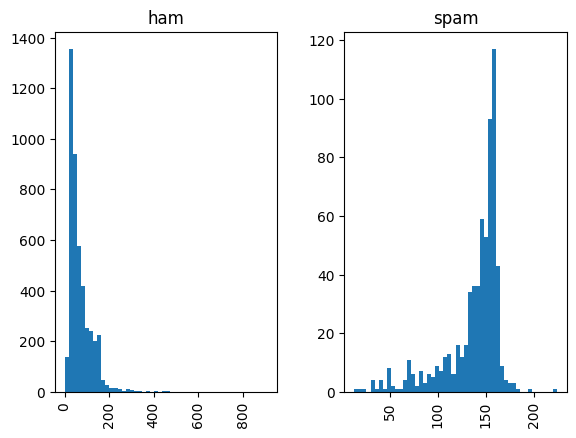

In [13]:
df.hist(column='Length', by='class', bins=50)

## Step 2 - Preprocessing

PorterStemmer gives the stemming function.
You can also use lemmatization as well.

Nltk has its own stopwords and rules, that can be downloaded by 'download' function.
* 'stopwords' = nltk in build stop words
* 'punkt' = nltk rules for stemming

In [14]:
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('punkt')
ps = PorterStemmer()

df.head(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,class,sms,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Preprocessing Tasks:
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation.
* Stemming

The following function applies above tasks for all words.

In [17]:
import string

def clean_text(text):
  text = text.lower() #lowercases the word
  text = nltk.word_tokenize(text) #apply tokenization

  y = []
  for i in text:
    if i.isalnum(): #checking if valid words (alpha-numeric), special chars are dropped here.
      y.append(i)

  text = y[:]
  y.clear()

  for i in text: #check if a stopword or not, punctuation or not
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i)) #apply the stemming (removing post-fixes)

  return " ".join(y) #join all tokens using white-space


A new column is created named 'sms_cleaned' which contains the output of each row after passing through the above function.

In [18]:
df['sms_cleaned'] = df['sms'].apply(clean_text)
df.head(5)

,class,sms,Length,sms_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


In the output of the above code, you can see all of the words in sms are preprocessed according to the tasks, and added to a new column named 'sms_cleaned'

## Step 3 - Feature Extraction

This step converts the words above, to numbers, using TF-IDF Vectorization

'sklearn' library includes built-in machine learning functions, algorithms.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In order to convert, the vectorizor can be called, and specify how many features want (size of the vocabulary)

Then the column should be specified for the transformation, and the output is captured to an array.

2d array; rows=sms, cols=tokens in vocab

In [26]:
tf_vec = TfidfVectorizer(max_features = 3000)
X = tf_vec.fit_transform(df['sms_cleaned']).toarray()

X.shape

(5169, 3000)

Next, we'll define the output class, which contains the output of the model (spam or ham)

In [27]:
Y= df['class'].values

## Step 4 - Learning
This step contains the training of the model.

* Train = 80%
* Test = 20% ; *hence the test_size=0.2*


In [36]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.2, random_state=2)

We use 'naive' Machine Learning algorithm.

'model.fit' tells the model to train using the x and y values

Here, only the 'x' data is given to the model, then the model will predict the 'y'.

In [37]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(xTrain, yTrain)

MultinomialNB()

After that, the accuracy of the model is captured. Will return an accuracy score between 0 - 1.

In [38]:
from sklearn.metrics import accuracy_score
yPred = model.predict(xTest)
print(accuracy_score(yTest, yPred))

0.9709864603481625
